In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.cross_validation import KFold # old version

from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Needed to show plots inline for notebooks
%matplotlib inline

In [2]:
SalaryVisual = pd.read_csv('./Kaggle_Salary.csv',header=1)
SalaryVisual.drop(['Unnamed: 396','0'], axis=1,inplace=True)
#print(SalaryVisual.columns)
SalaryVisual.head()

/home/hanwen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (209,323,372,385,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Other - Text,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too expensive,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too time-consuming,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Requires too much technical knowledge,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text
0,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
3,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1
4,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,-1,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [3]:
SalaryVisual.columns.tolist()

['Duration (in seconds)',
 'What is your gender? - Selected Choice',
 'What is your gender? - Prefer to self-describe - Text',
 'What is your age (# years)?',
 'In which country do you currently reside?',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Which best describes your undergraduate major? - Selected Choice',
 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'Select the title most similar to your current role (or most recent title if retired): - Other - Text',
 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice',
 'In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text',
 'How many years of experience do you have in your current role?',
 'What is your current yearly compensation (approximate $USD)?',
 'Does your current employer incorpo

In [4]:
mapcol = {'What is your gender? - Selected Choice':'Gender','What is your age (# years)?':'Age',
'In which country do you currently reside?':'ResidingCountry',
'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'EducationDegree',
'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'JobTitle',
'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice':'EmploymentIndustry',
'Which best describes your undergraduate major? - Selected Choice':'Major',
'How many years of experience do you have in your current role?':'YearExperience',
'What is your current yearly compensation (approximate $USD)?':'YearlyCompensation',
'Approximately what percent of your time at work or school is spent actively coding?':'TimeSpendCoding',
'How long have you been writing code to analyze data?':'CodeDataAnalyze',
'For how many years have you used machine learning methods (at work or in school)?':'YearsML',
'Do you consider yourself to be a data scientist?':'SelfCog',
'What is the type of data that you currently interact with most often at work or school? - Selected Choice':'DataType',
'Approximately what percent of your data projects involve exploring model insights?':'PercentProject',
}

SalaryVisual.rename(columns=mapcol,inplace=True)

In [5]:
X = SalaryVisual[['Gender','Age','ResidingCountry','EducationDegree','Major','EmploymentIndustry',
'YearExperience','JobTitle','TimeSpendCoding','CodeDataAnalyze','YearsML','SelfCog','DataType',
'PercentProject']]

In [6]:
X.corr()

""


ValueError: zero-size array to reduction operation minimum which has no identity

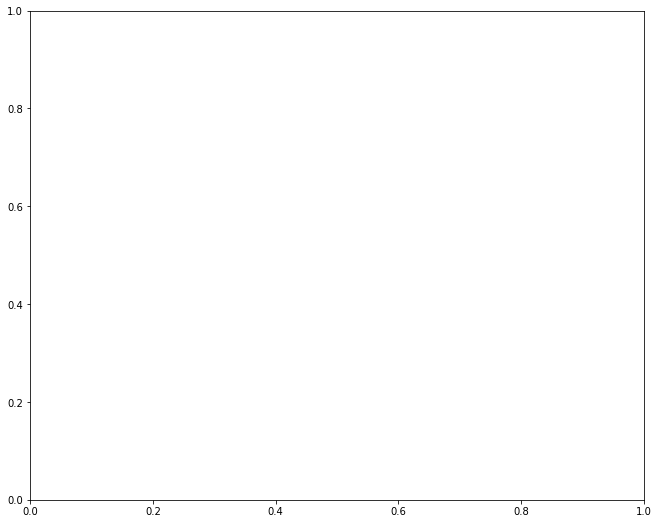

In [7]:
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
sns.pairplot(data = X)